# Goals

* Understand user engagement and feedback.
* Analyze app update patterns and category variations.
* Compare paid and free apps to inform monetization strategies.
* Investigate pricing and category relationships.
* Determine the impact of app size on installations.
* Explore the relationship between app size and category.
* Analyze correlations between app ratings and installations.
* Identify genres with higher average ratings.
* Analyze user sentiment and feedback in reviews.

# Data

The data obtained comes from Kaggle, where there are 2 tables, namely:

**googleplaystore** which contains data:
* App: This data contains the names of the mobile applications available on the Google Play Store.
* Category: The Category data categorizes apps into different groups based on their primary functions.
* Rating: The Rating data provides the average user rating of the app on the Google Play Store.
* Reviews: This data indicates the number of user reviews or ratings that an app has received.
* Size: The Size data denotes the file size of the app.
* Installs: The Installs data specifies the approximate number of times the app has been installed on users' devices.
* Type: The Type data categorizes apps as either "Free" or "Paid".
* Price: In the Price data, you can find the cost of paid apps.
* Content.Rating: This data provides information on the age-appropriateness of the app.
* Genres: The Genres data categorizes apps into various genres.
* Last.Updated: This data records the date of the app's most recent update.
* Current.Ver: The Current.Ver data contains the version number of the app currently available on the Google Play Store.
* Android.Ver: Android.Ver provides details about the minimum Android version required to run the app.

**googleplaystore_user_review** which contains data:
* App: This data contains the names of the mobile applications available on the Google Play Store.
* Translated_Review: This data contains text data, likely user reviews or comments about the app.
* Sentiment: The Sentiment data classifies user reviews into sentiment categories, such as "Positive" "Neutral" or "Negative".
* Sentiment_Polarity: This data quantifies the sentiment polarity of user reviews.
* Sentiment_Subjectivity: The Sentiment_Subjectivity data quantifies the subjectivity of user reviews.

# Analysis

Relationship between Number of Reviews and Average Rating:

* Gather data on the number of reviews and average ratings for various apps.
* Analyze the data to determine if there is a correlation between the number of reviews an app receives and its average rating.

Seasonal Patterns of App Updates by Category:

* Collect data on the frequency of app updates over different months or seasons.
* Categorize apps into their respective categories.
* Analyze the data to identify patterns in the frequency of updates by category and season.

Comparison of Ratings Between Paid and Free Apps by Category:

* Collect data on the pricing (paid or free) and average ratings for apps.
* Categorize apps by their respective categories.
* Analyze the data to compare the average ratings of paid and free apps within different app categories.

Relationship between App Category and Price:

* Gather data on the prices of apps within different categories.
* Analyze the data to determine if there is a relationship between the app category and the average price of apps.

Relationship Between App Size and Number of Installations:

* Collect data on app sizes and the number of installations.
* Categorize apps by their respective categories.
* Analyze the data to identify if there is a correlation between the size of an app and the number of installations, considering variations by category.

Relationship Between App Size and Category:

* Gather data on app sizes and their corresponding categories.
* Analyze the data to determine if there is a relationship between app size and the app category, identifying any trends in size across categories.

Relationship Between App Rating and Number of Installs:

* Collect data on app ratings and the number of installations.
* Analyze the data to establish if there is a correlation between app ratings and the number of installations, considering variations across content ratings.

Comparison of Ratings Across App Genres:

* Gather data on app ratings and categorize apps by genres.
* Analyze the data to determine if certain genres tend to have higher ratings, and identify the top genres in terms of average ratings.

Sentiment Analysis of User Reviews:

* Collect user reviews and apply sentiment analysis to categorize them into sentiment categories (positive, neutral, negative).
* Analyze the distribution of sentiment polarity across different sentiment categories.

# Import Library

In [1]:
install.packages('psych')
install.packages('corrr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘Rcpp’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘ggrepel’, ‘seriation’




In [2]:
library(dplyr)
library(tibble)
library(lubridate)
library(psych)
library(corrr)
library(tidyverse)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats 1.0.0     ✔ readr   2.1.4
✔ ggplot2 3.4.4     ✔ stringr 1.5.0
✔ purrr   1.0.2     ✔ tidyr   1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Data Loading

In [3]:
data1 <- read.csv("/content/googleplaystore.csv")
data2 <- read.csv("/content/googleplaystore_user_reviews.csv")

In [4]:
# Check the data
head(data1,n=5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
3,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
5,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Check the data
head(data2,n=5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.00,0.5333333
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.2884615
3,10 Best Foods for You,nan,nan,NaN,NaN
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.8750000
5,10 Best Foods for You,Best idea us,Positive,1.00,0.3000000


# Data Preprocessing

## Data Manipulation

Data manipulation is carried out in several columns to reduce diversity in the data. Some of these columns include:

In [6]:
data1$Reviews <- as.integer(gsub("[^0-9.]+", "", data1$Reviews))

convert_size_to_int <- function(size) {
  if (size == "Varies with device") {
    return(size)
  } else {

    numeric_part <- gsub("[A-Za-z+,]", "", size)
    if (grepl("M", size)) {
      size <- as.integer(as.numeric(numeric_part) * 1000000)
    } else if (grepl("k", size)) {
      size <- as.integer(as.numeric(numeric_part) * 1000)
    } else {
      size <- NA
    }
    return(size)
  }
}
data1$Size <- sapply(data1$Size, convert_size_to_int)
data1$Size <- as.integer(gsub("[^0-9]+", "", data1$Size))

data1$Installs <- as.integer(gsub("[^0-9]+", "", data1$Installs))

data1$Price <- as.numeric(gsub("[^0-9.]+", "", data1$Price))

data1$Last.Updated <- as.Date(data1$Last.Updated, format = "%B %d, %Y")

## Handling Missing Values

In [7]:
# Check for missing values in the data
missing_data1 <- data1 %>%
  summarize_all(.funs = ~ sum(is.na(.)))
missing_data1

App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,1474,0,1696,1,0,1,0,0,1,0,0


In [8]:
# Check for missing values in the data
missing_data2 <- data2 %>%
  summarize_all(.funs = ~ sum(is.na(.)))
missing_data2

App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
<int>,<int>,<int>,<int>,<int>
0,0,0,26863,26863


In [9]:
# Handling missing values in data
data1 <- data1[complete.cases(data1), ]
data2 <- data2[complete.cases(data2), ]

# Handling Outliers

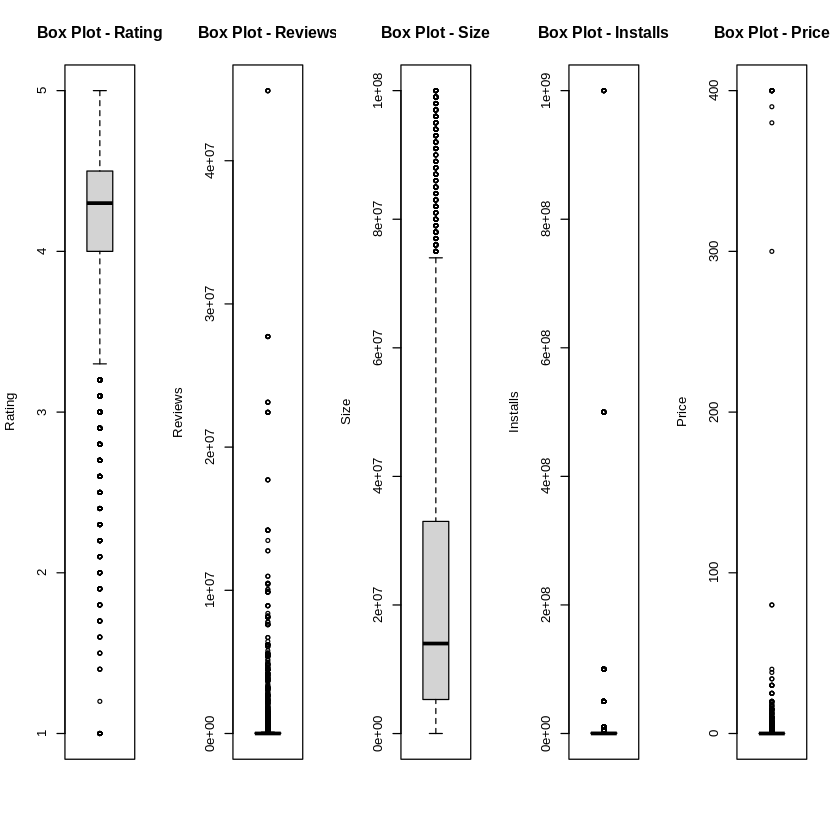

In [10]:
# Check for outliers in the data
numeric_cols <- sapply(data1, is.numeric)

par(mfrow=c(1, sum(numeric_cols)))

for (col in colnames(data1)[numeric_cols]) {
  boxplot(data1[[col]], main=paste("Box Plot -", col), ylab=col, xlab="")
}

Outliers were not handled to maintain data purity.

# Exploratory Data Analysis (EDA)

In [11]:
summary(data1)

     App              Category             Rating         Reviews        
 Length:7729        Length:7729        Min.   :1.000   Min.   :       1  
 Class :character   Class :character   1st Qu.:4.000   1st Qu.:     108  
 Mode  :character   Mode  :character   Median :4.300   Median :    2328  
                                       Mean   :4.174   Mean   :  294673  
                                       3rd Qu.:4.500   3rd Qu.:   38961  
                                       Max.   :5.000   Max.   :44893888  
      Size              Installs             Type               Price        
 Min.   :     8500   Min.   :1.000e+00   Length:7729        Min.   :  0.000  
 1st Qu.:  5300000   1st Qu.:1.000e+04   Class :character   1st Qu.:  0.000  
 Median : 14000000   Median :1.000e+05   Mode  :character   Median :  0.000  
 Mean   : 22957607   Mean   :8.418e+06                      Mean   :  1.128  
 3rd Qu.: 33000000   3rd Qu.:1.000e+06                      3rd Qu.:  0.000  
 Max.   :10000

In [12]:
summary(data2)

     App            Translated_Review   Sentiment         Sentiment_Polarity
 Length:37432       Length:37432       Length:37432       Min.   :-1.0000   
 Class :character   Class :character   Class :character   1st Qu.: 0.0000   
 Mode  :character   Mode  :character   Mode  :character   Median : 0.1500   
                                                          Mean   : 0.1821   
                                                          3rd Qu.: 0.4000   
                                                          Max.   : 1.0000   
 Sentiment_Subjectivity
 Min.   :0.0000        
 1st Qu.:0.3571        
 Median :0.5143        
 Mean   :0.4927        
 3rd Qu.:0.6500        
 Max.   :1.0000        

# Conclusion

In [13]:
options(
  repr.plot.width = 20,
  repr.plot.height = 10
)

### Is there a relationship between the number of reviews an app receives and its average rating?

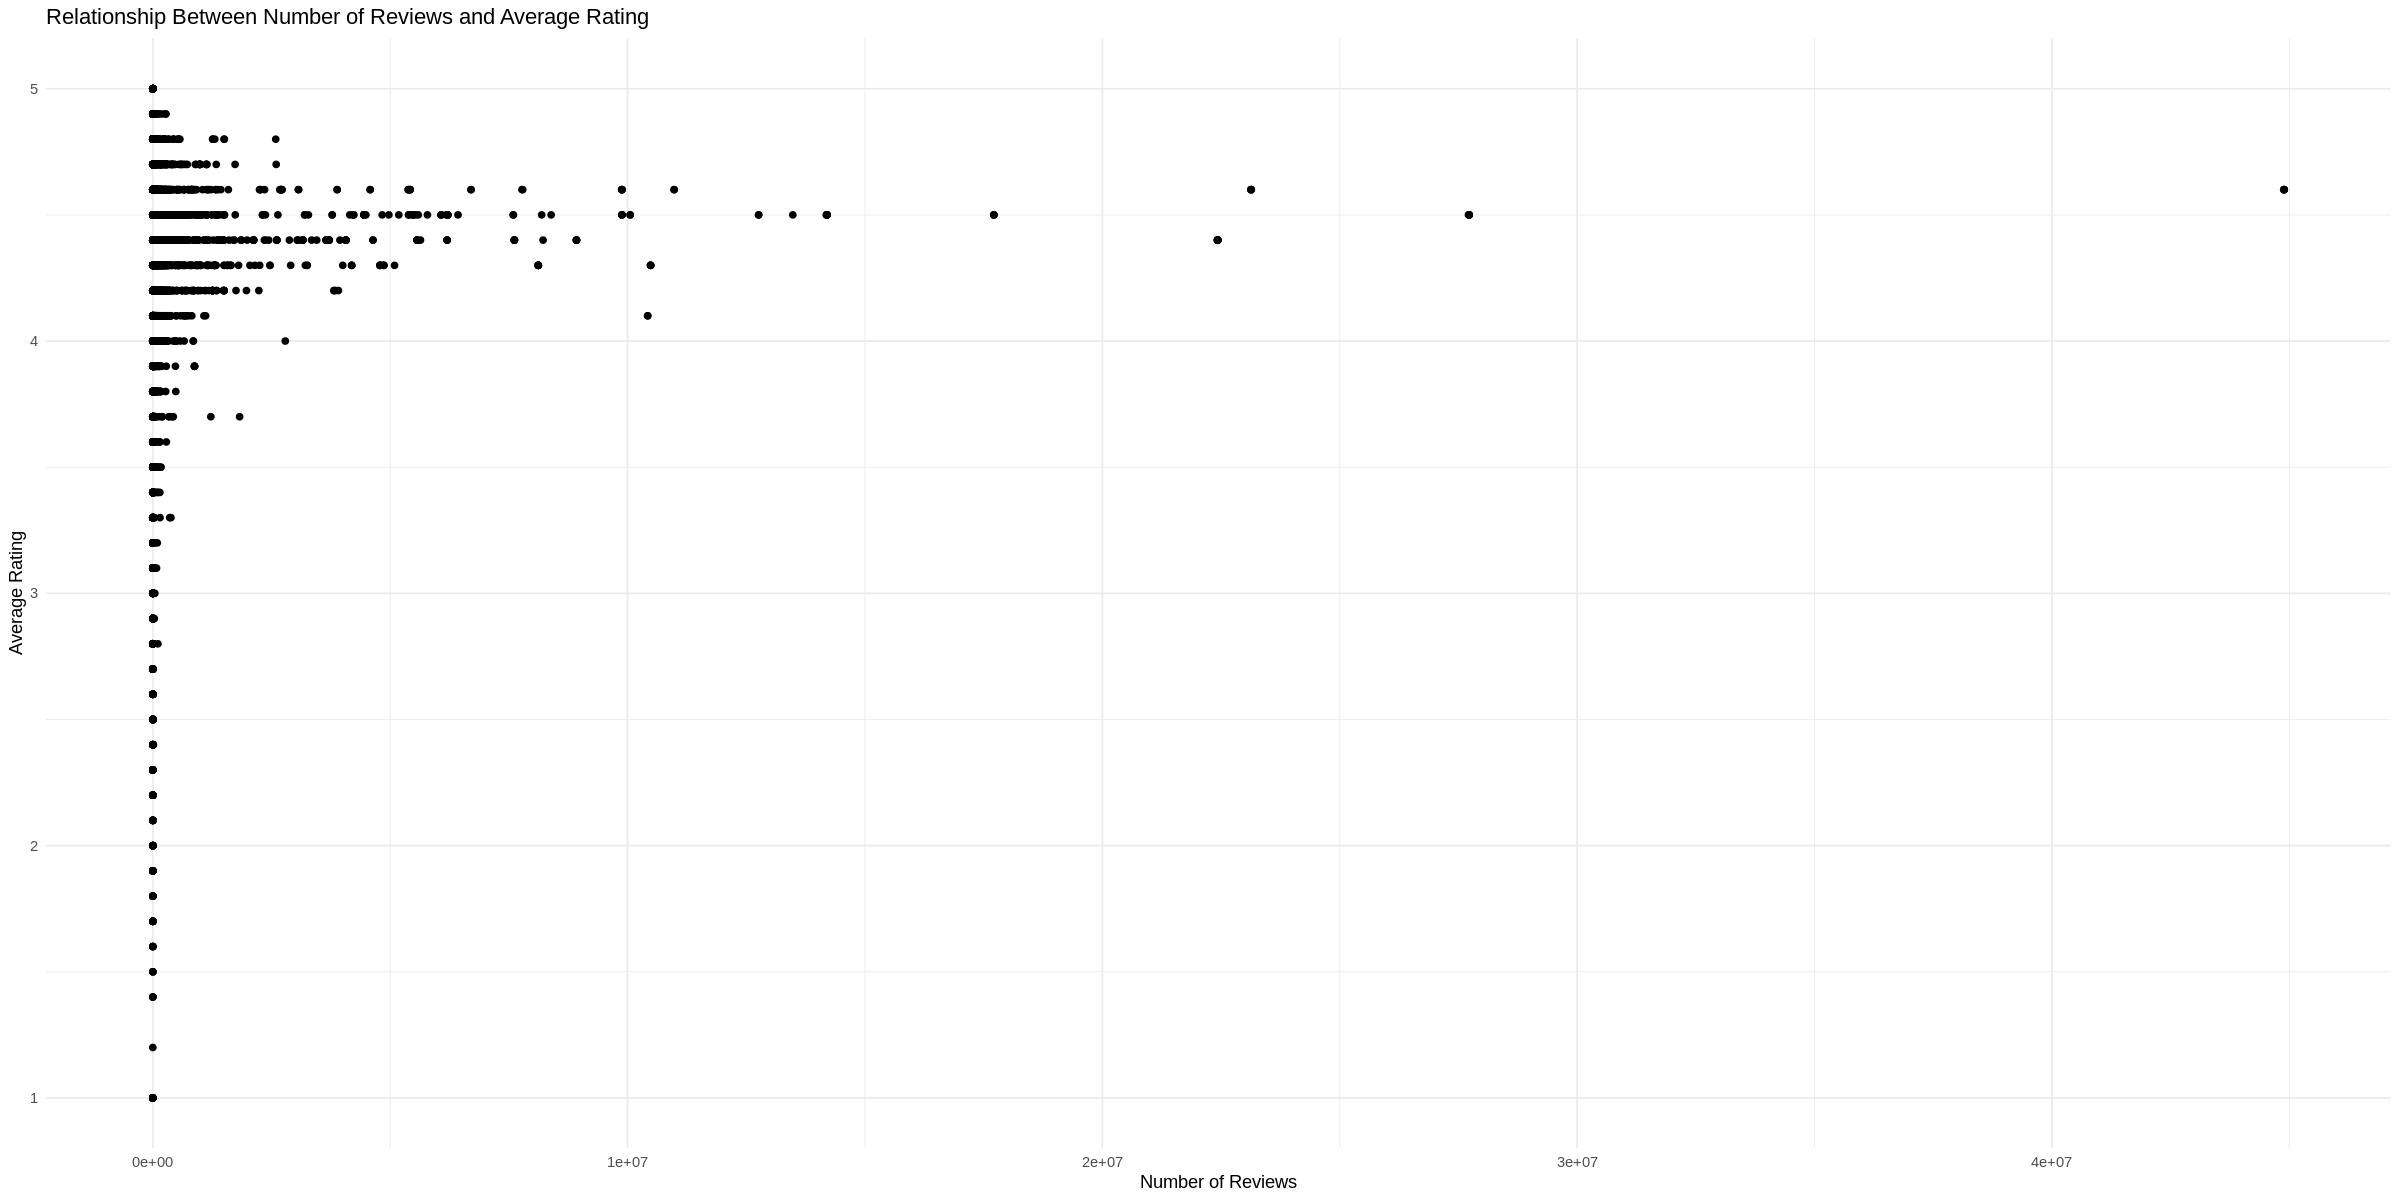

In [14]:
ggplot(data1, aes(x = Reviews, y = Rating)) +
  geom_point() +
  labs(
    title = "Relationship Between Number of Reviews and Average Rating",
    x = "Number of Reviews",
    y = "Average Rating",
  ) +
  theme_minimal()

Yes there a relationship between the number of reviews an app receives and its average rating. The number of reviews is highest when the average rating is between 4 and 5.

### Are there particular months or seasons when app updates are more frequent, and does this pattern vary by app category?

Warning message in geom_freqpoly(stat = "count", binwidth = 1):
“Ignoring unknown parameters: `binwidth`”


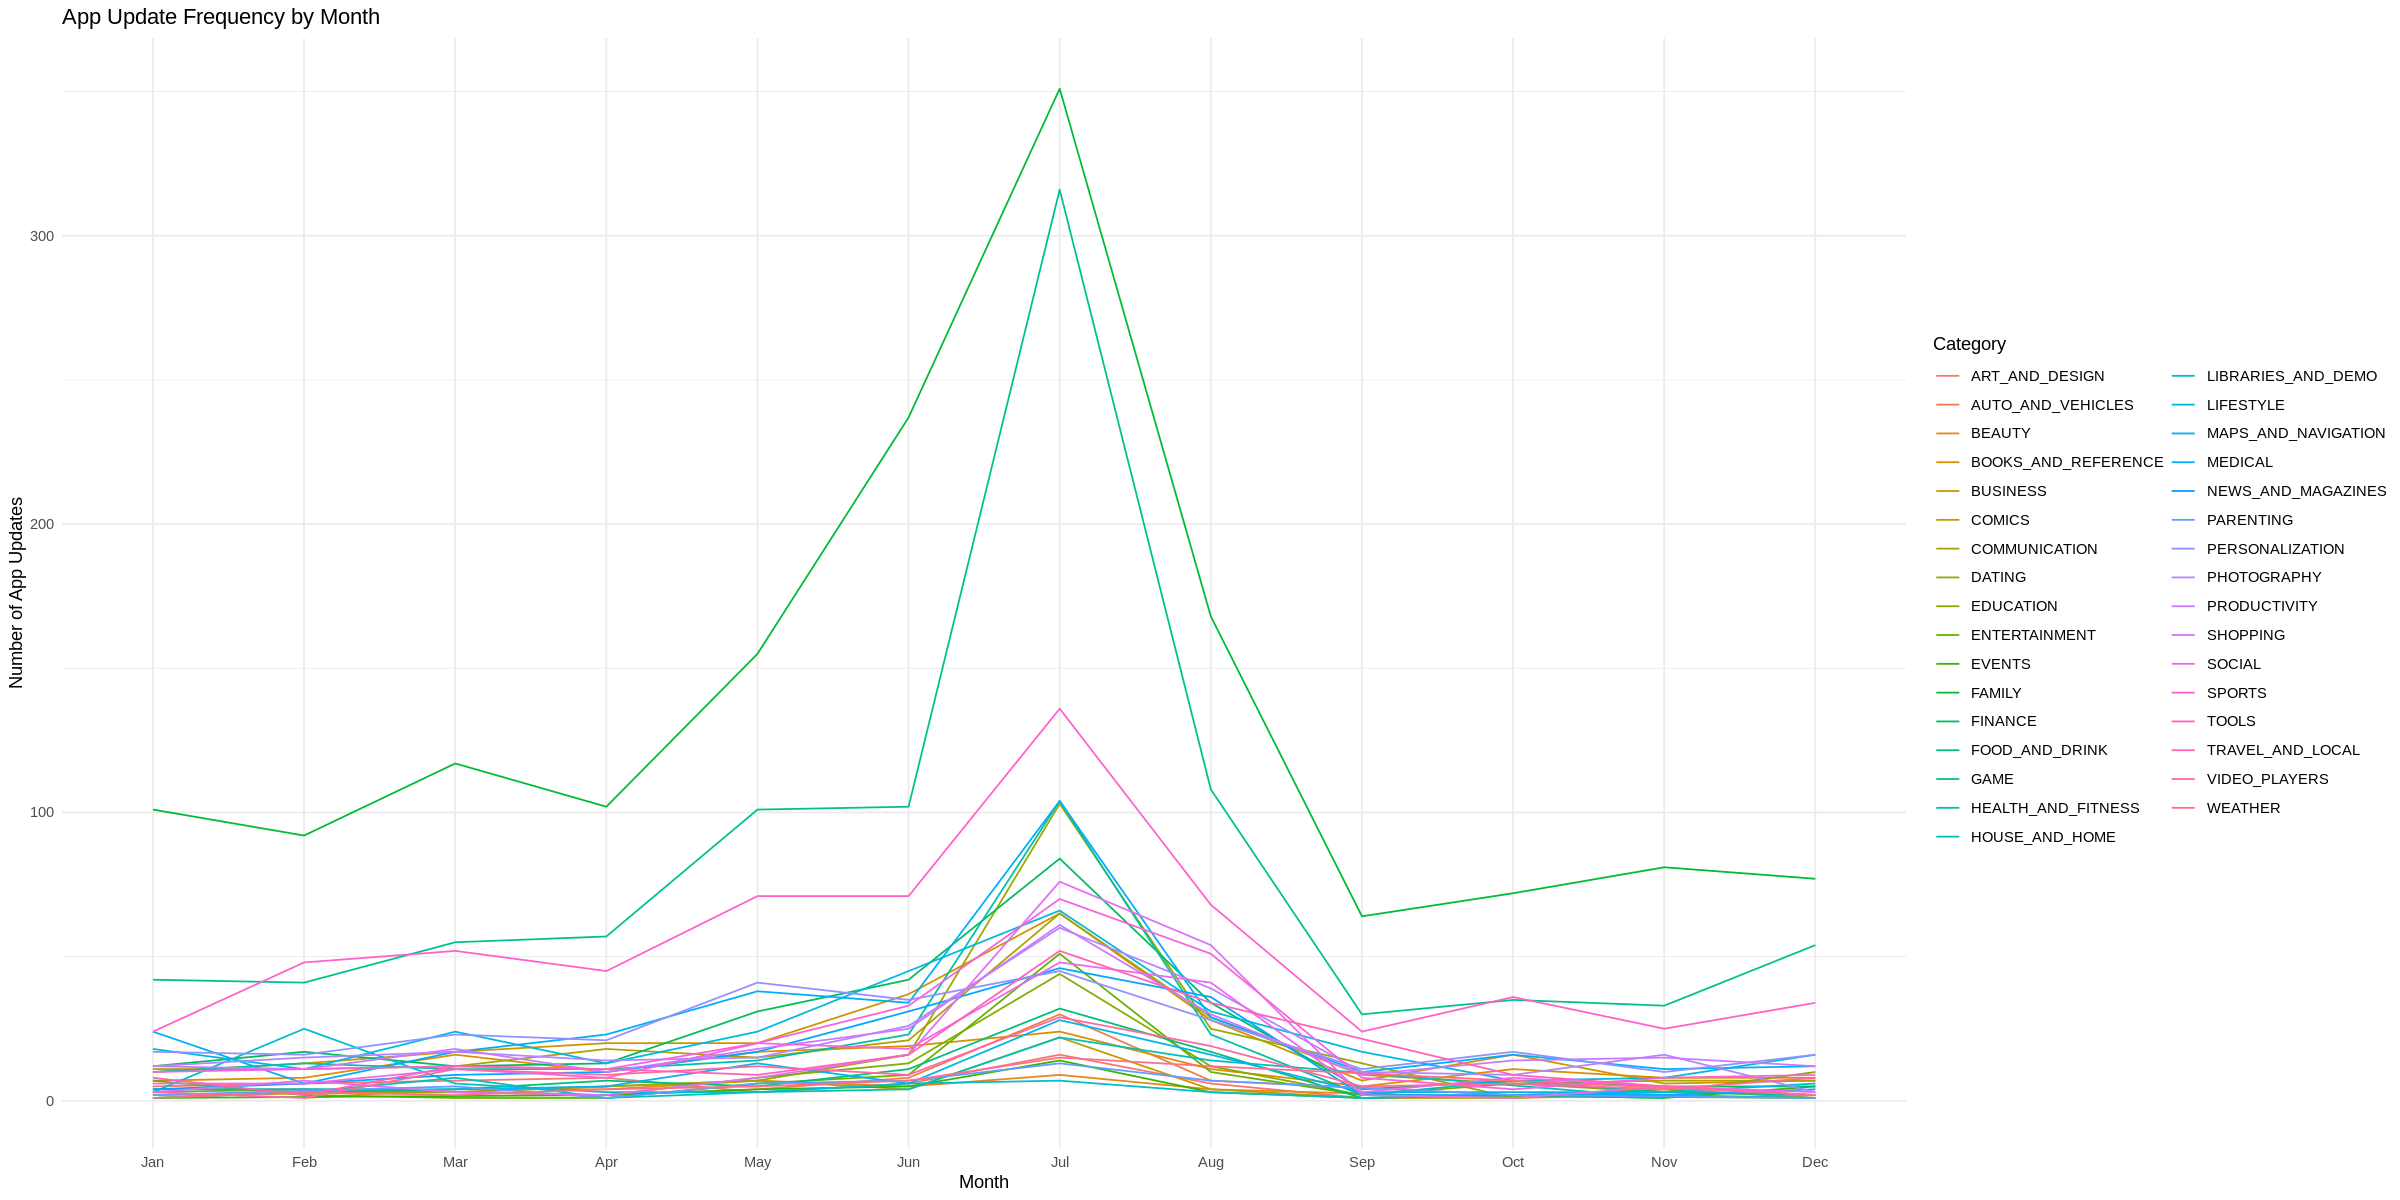

In [15]:
data1$Last.Updated <- as.Date(data1$Last.Updated)

data1$Month <- format(data1$Last.Updated, "%b")

ggplot(data1, aes(x = Month, group = Category, color = Category)) +
  geom_freqpoly(stat = "count", binwidth = 1) +
  labs(
    title = "App Update Frequency by Month",
    x = "Month",
    y = "Number of App Updates"
  ) +
  theme_minimal() +
  scale_x_discrete(limits = month.abb)

Yes, Updates in July occur more frequently than in other months and all categories have different update frequencies.

### Are paid apps more highly rated than free apps, and is this trend consistent across different app categories?

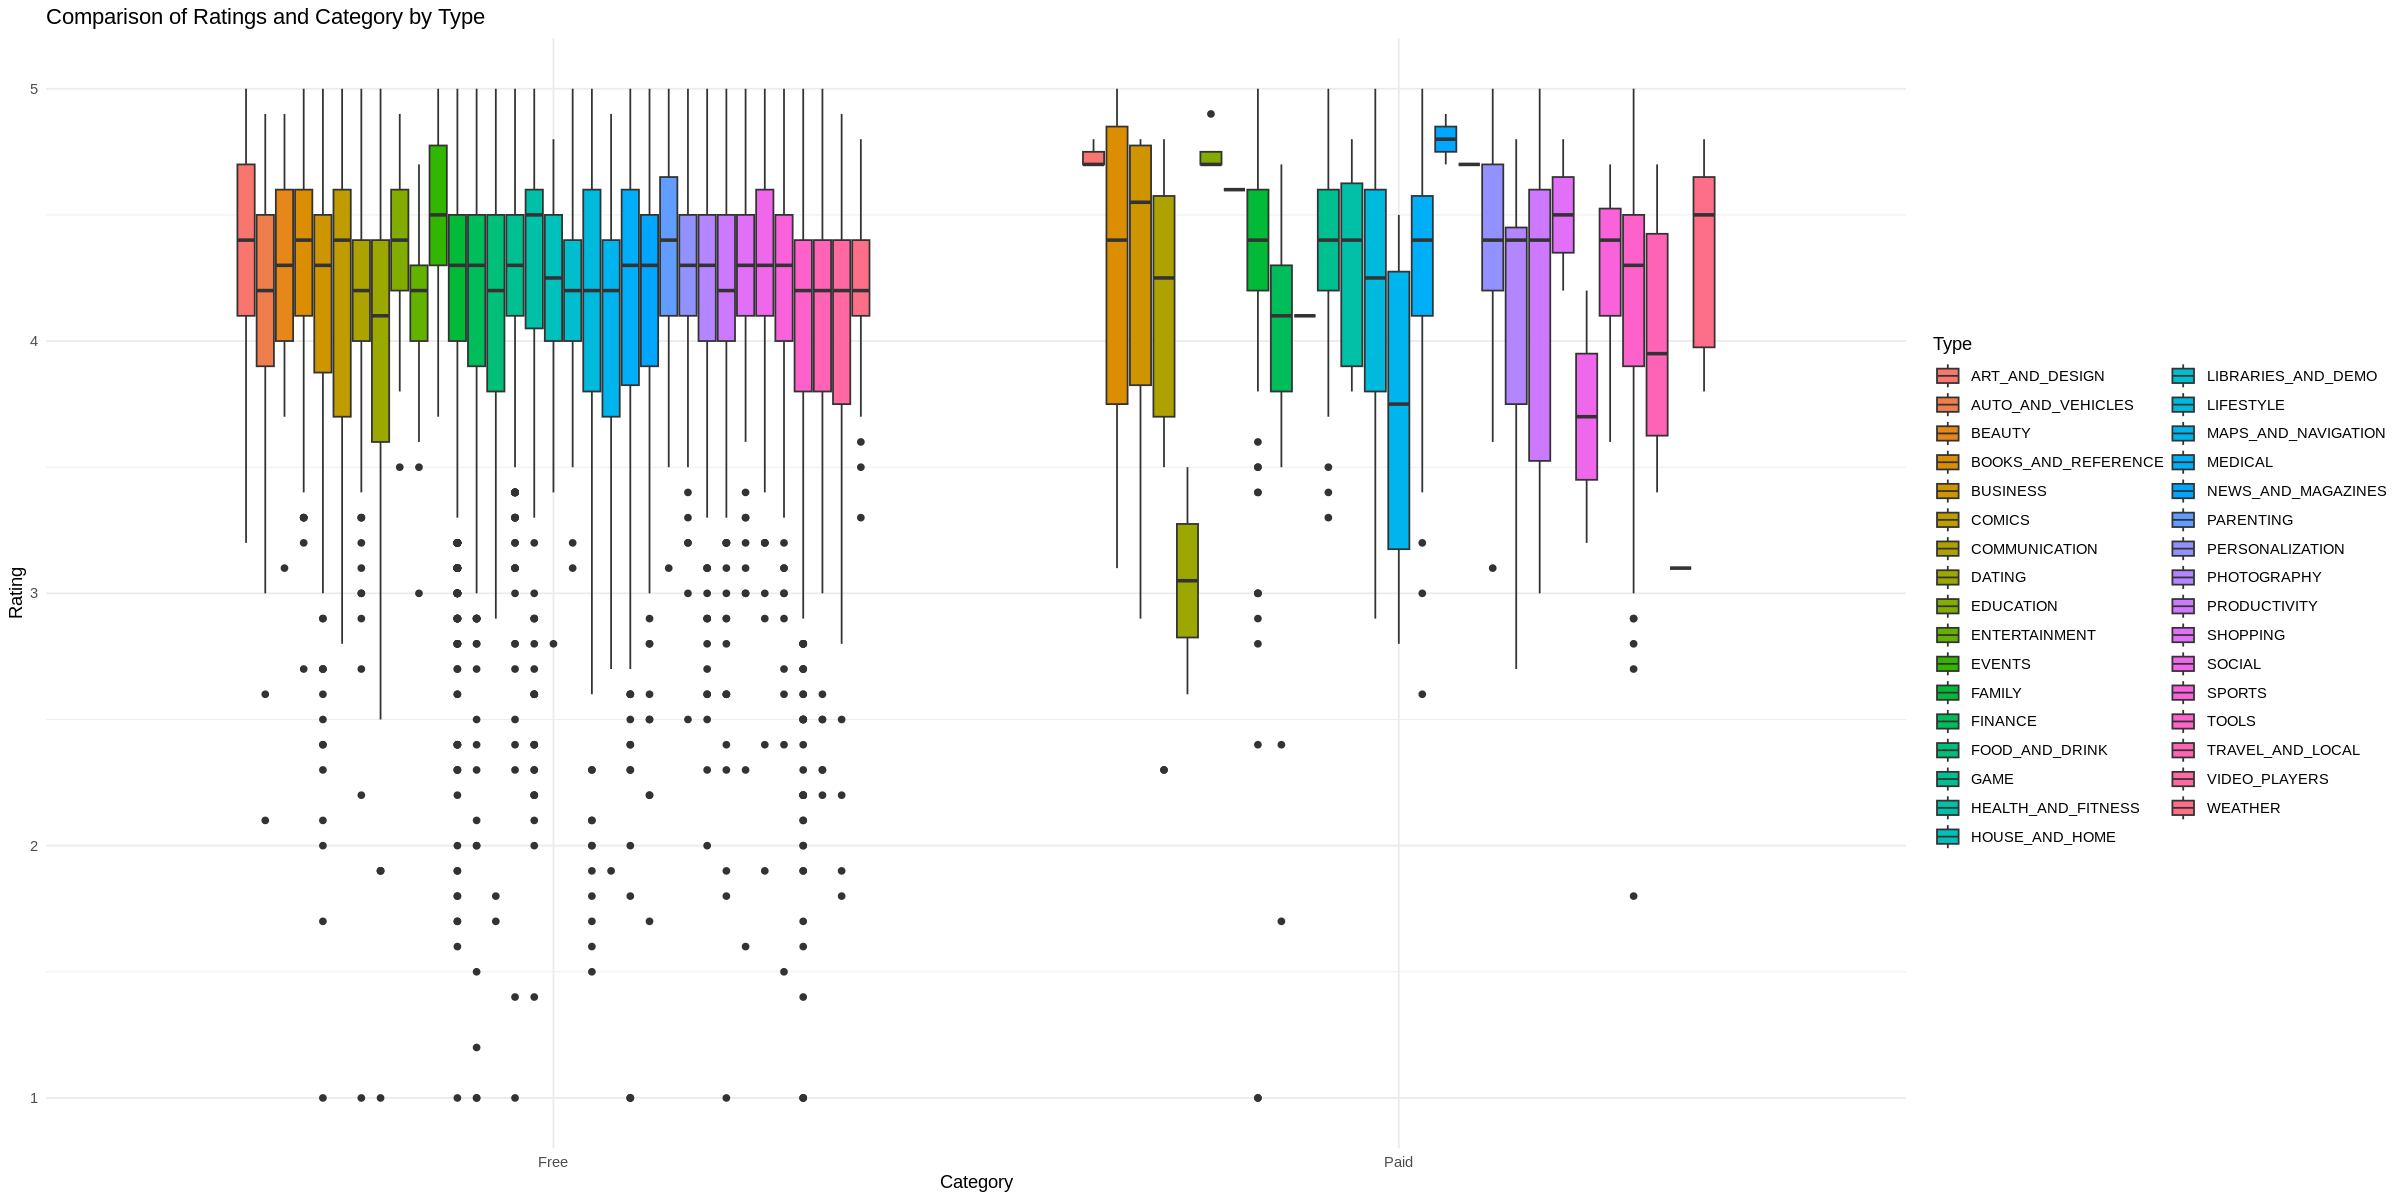

In [16]:
ggplot(data1, aes(x = Type, y = Rating, fill = Category)) +
  geom_boxplot() +
  labs(
    title = "Comparison of Ratings and Category by Type",
    x = "Category",
    y = "Rating",
    fill = "Type"
  ) +
  theme_minimal()

No, Paid apps have the same rating as free apps, but free apps have a more consistent distribution compared to paid apps.

### Is there a relationship between the app category and the average price of the apps?

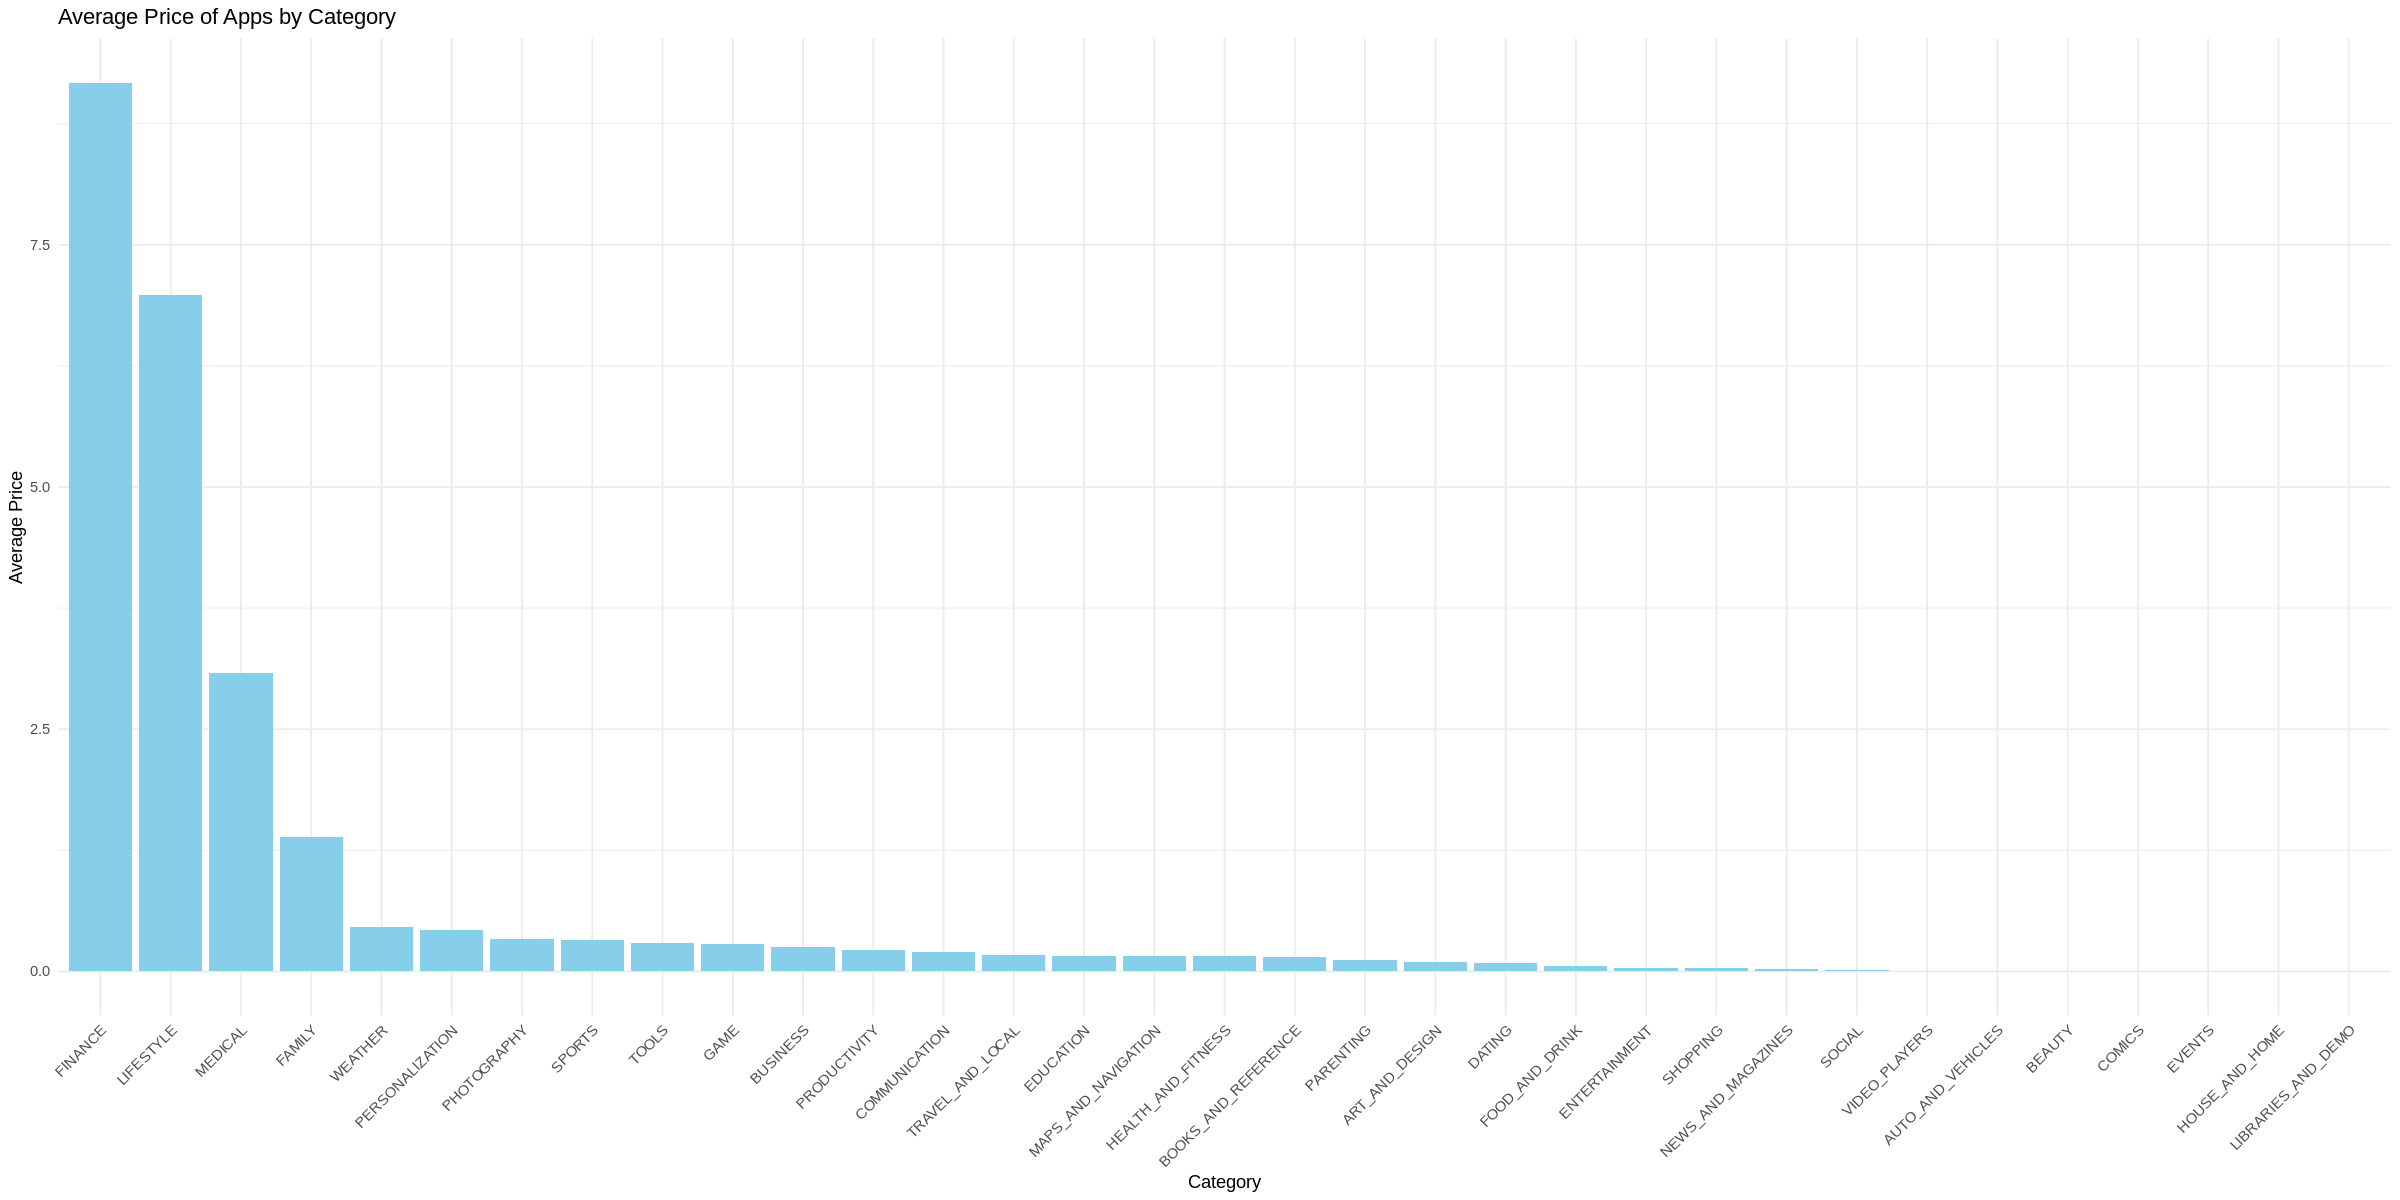

In [17]:
avg_price_by_category <- data1 %>%
  group_by(Category) %>%
  summarize(Avg_Price = mean(Price, na.rm = TRUE))

ggplot(avg_price_by_category, aes(x = reorder(Category, -Avg_Price), y = Avg_Price)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(
    title = "Average Price of Apps by Category",
    x = "Category",
    y = "Average Price"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Yes there a relationship between the app category and the average price of the apps, which can be seen in the finance category has the highest average price compared to other categories.

### Is there a relationship between the size of an app and the number of installations it receives? And, does this relationship vary by app category?

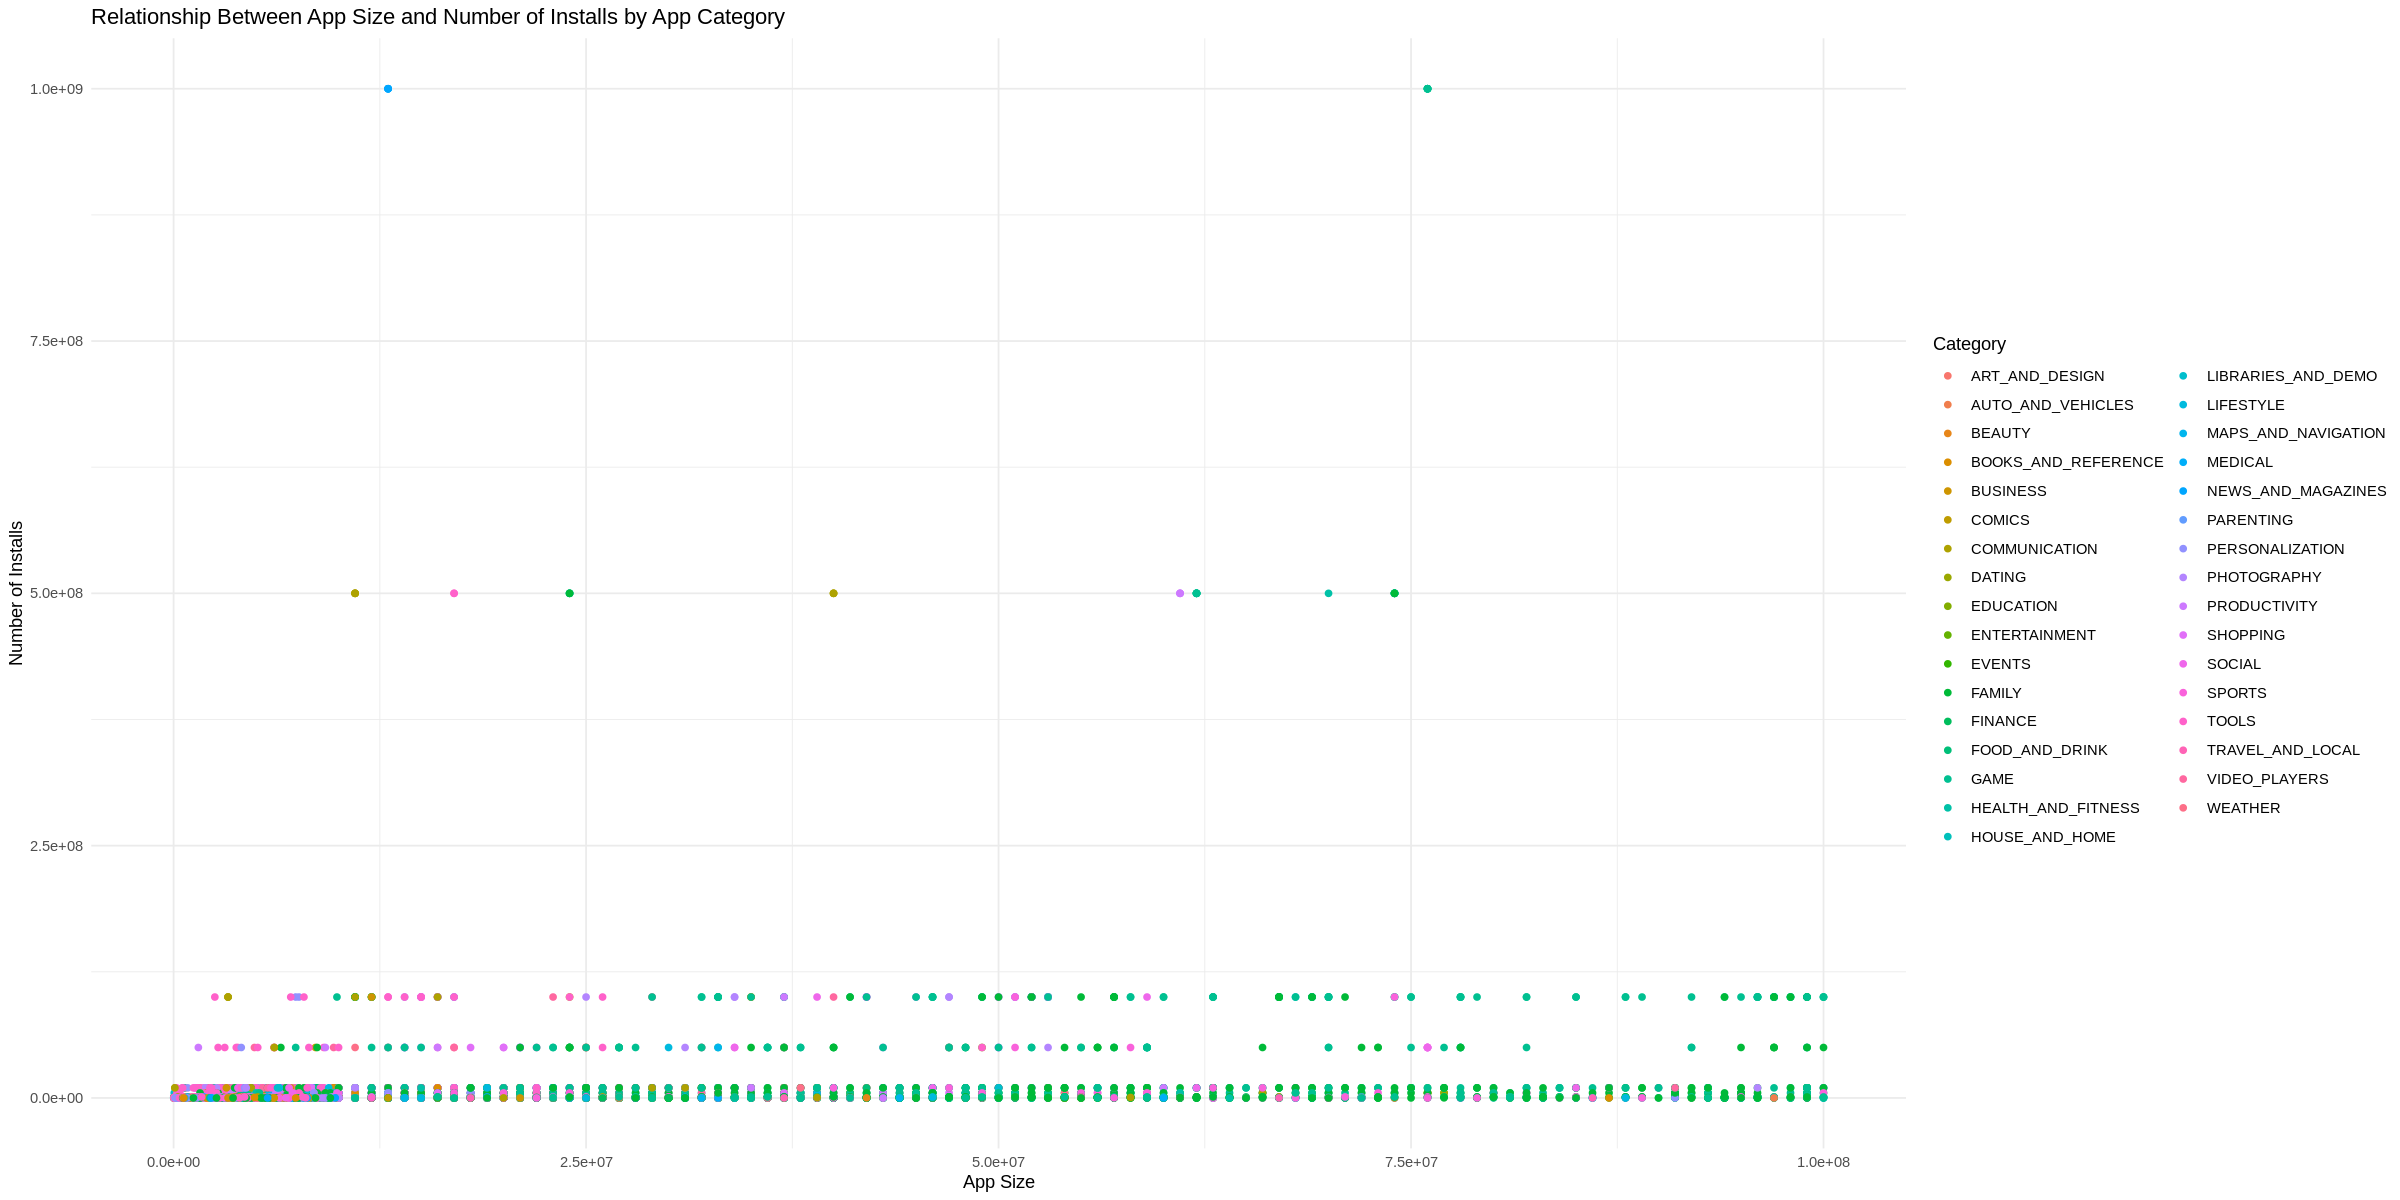

In [18]:
ggplot(data1, aes(x = Size, y = Installs, color = Category)) +
  geom_point() +
  labs(
    title = "Relationship Between App Size and Number of Installs by App Category",
    x = "App Size",
    y = "Number of Installs",
    color = "Category"
  ) +
  theme_minimal()

Yes there a relationship between the size of an app and the number of installations it receives. The fewer the number of installs, the more diverse the number of app sizes will be and when the number of installs and app sizes are small, the categories will be more diverse.

### Is there a relationship between the size of an app and its category, and do certain categories tend to have larger or smaller app sizes?

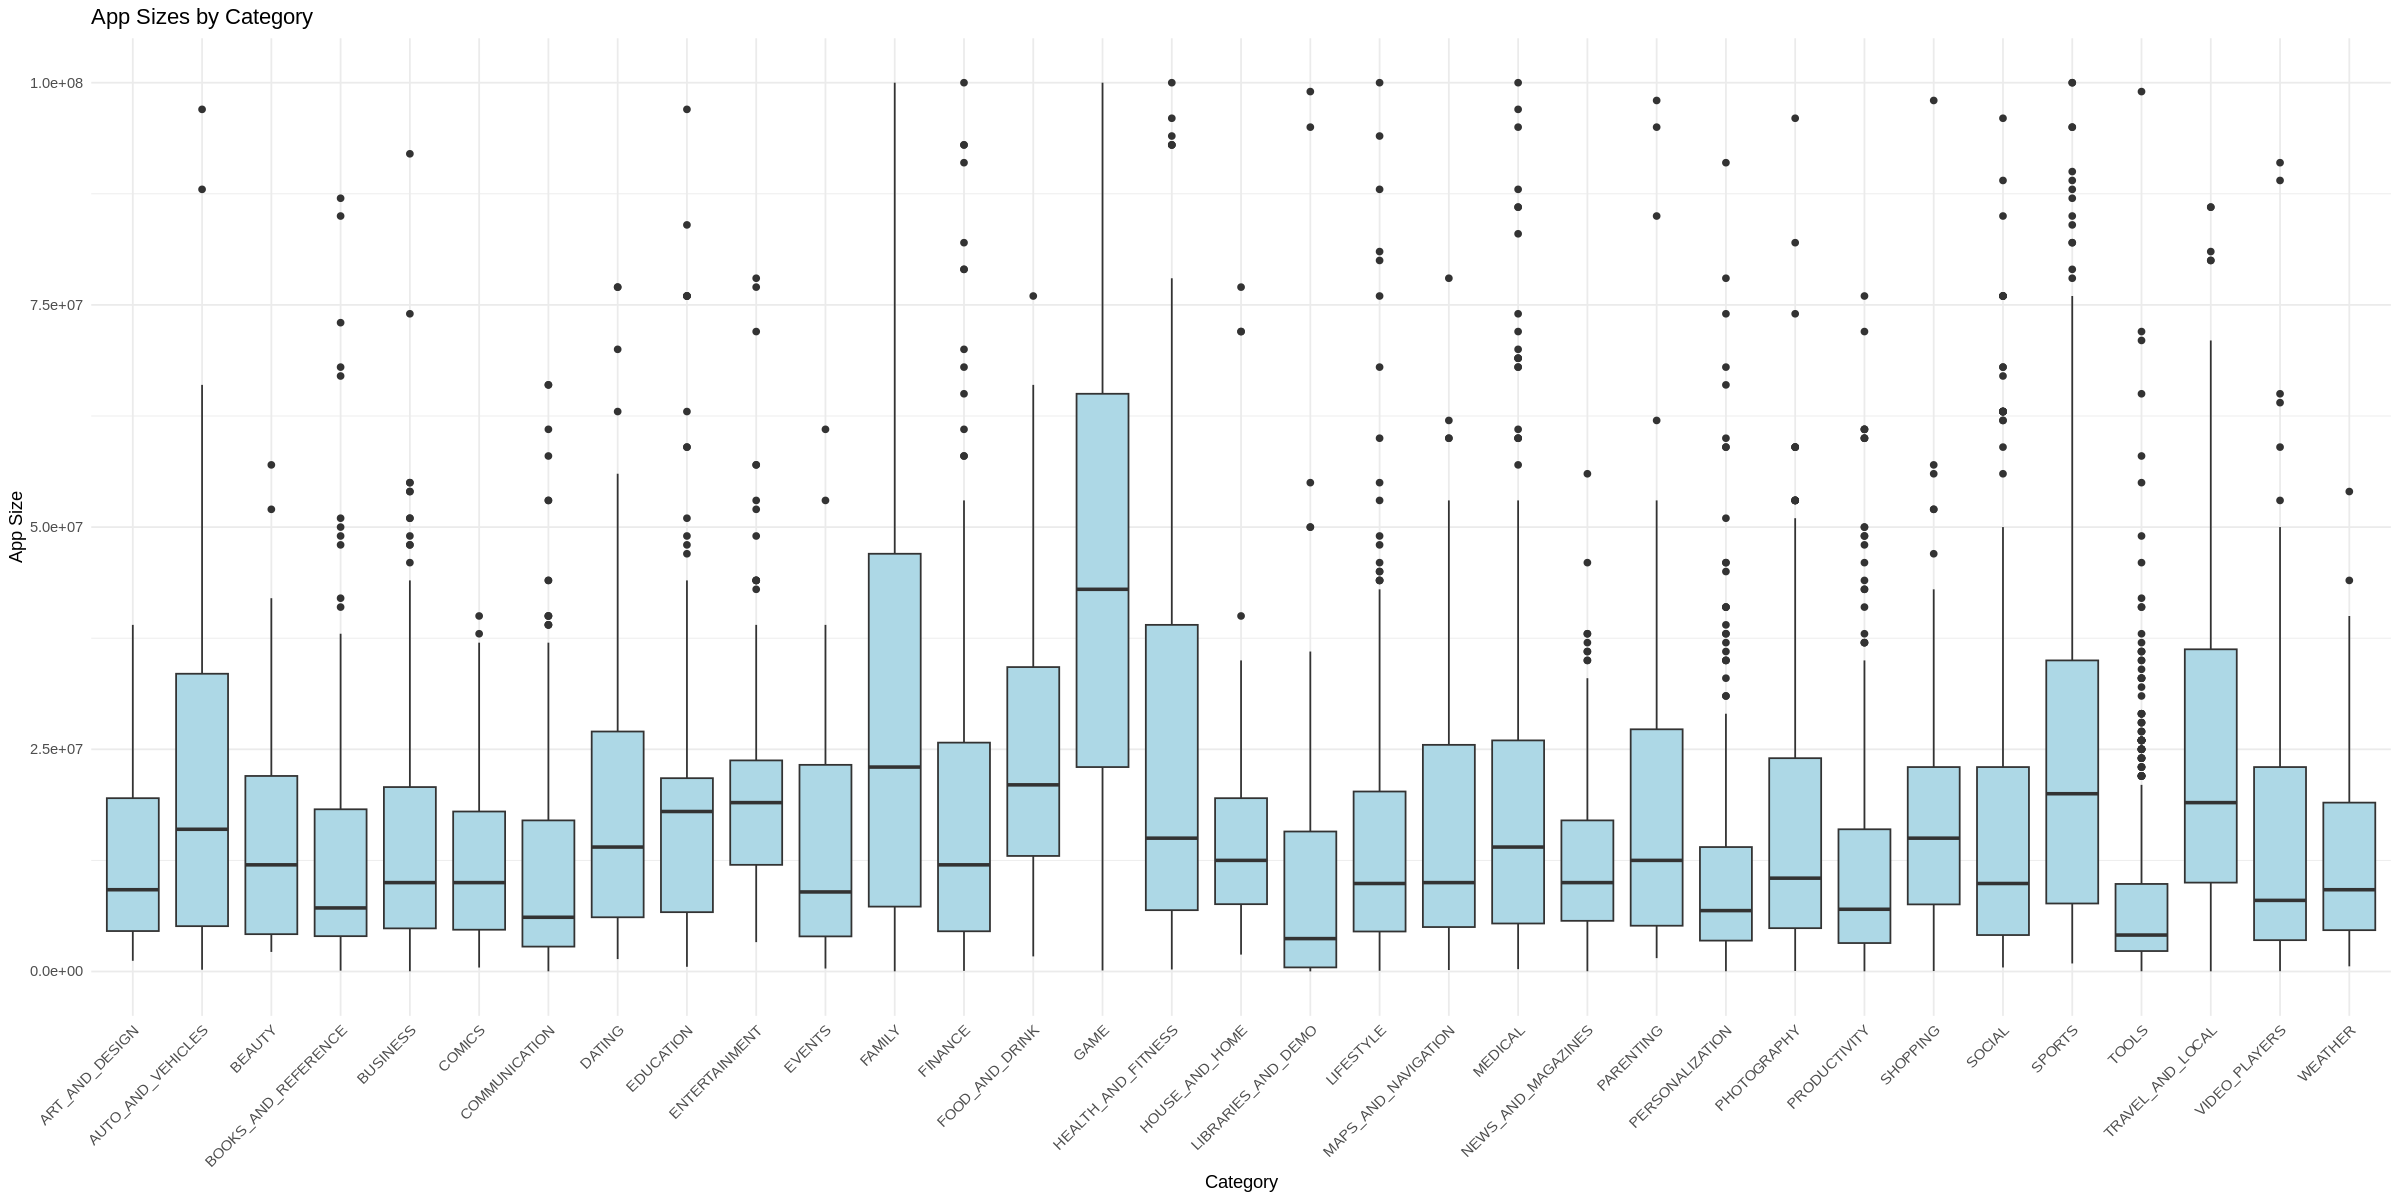

In [19]:
ggplot(data1, aes(x = Category, y = Size)) +
  geom_boxplot(fill = "lightblue") +
  labs(
    title = "App Sizes by Category",
    x = "Category",
    y = "App Size"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Yes there a relationship between the size of an app and its category, which is where the game category tends to have larger app sizes compared to other categories.

### Do apps with a higher rating tend to have more installs, and is this trend consistent across different content ratings?

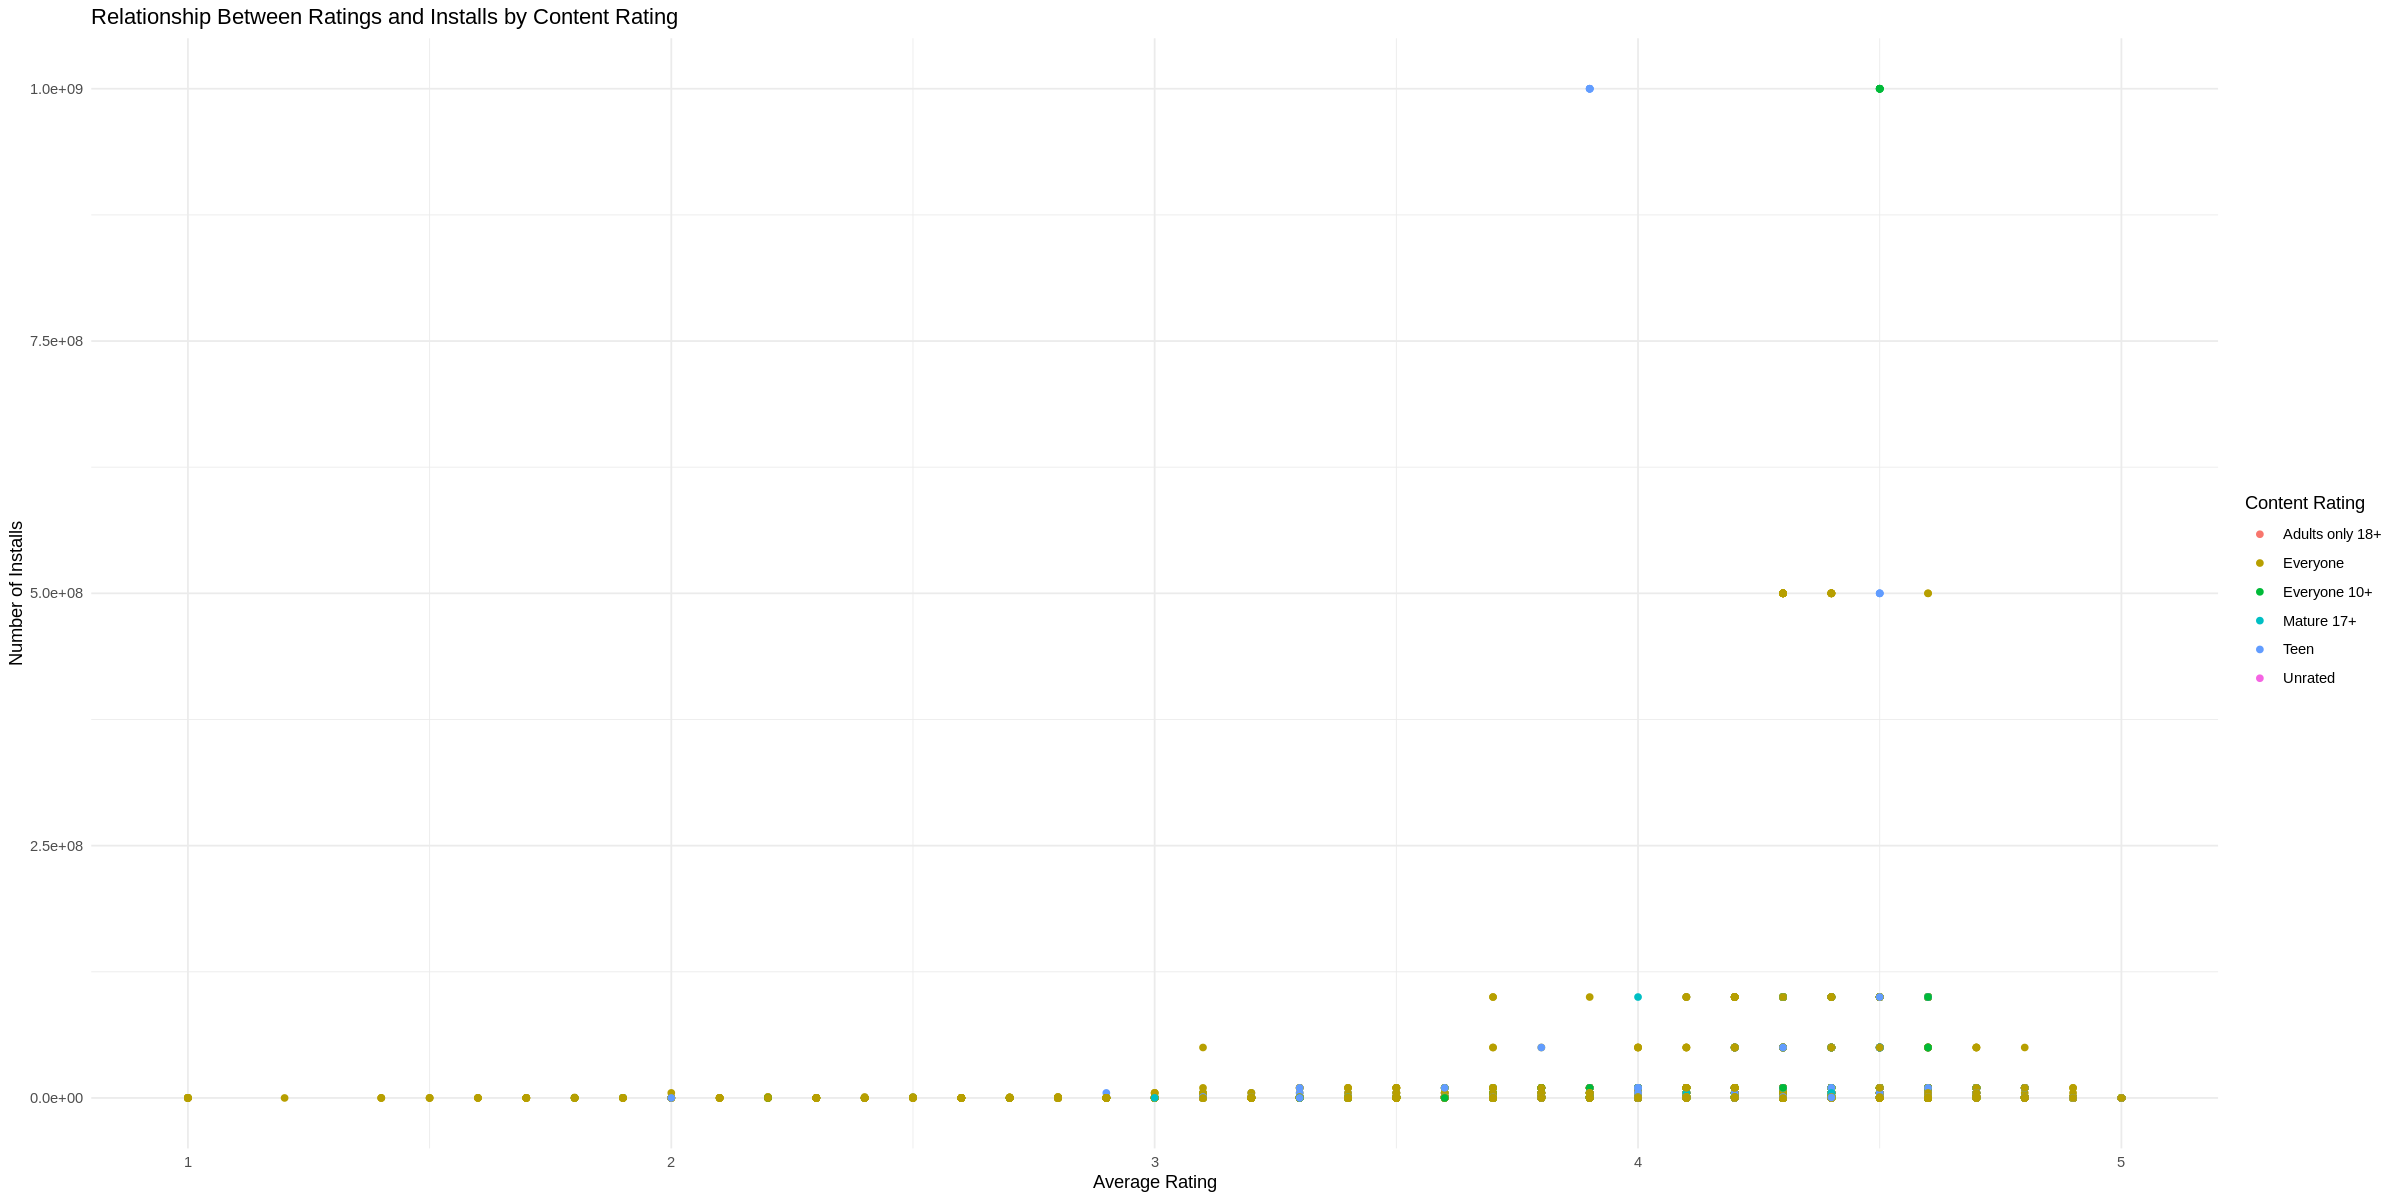

In [20]:
ggplot(data1, aes(x = Rating, y = Installs, color = Content.Rating)) +
  geom_point() +
  labs(
    title = "Relationship Between Ratings and Installs by Content Rating",
    x = "Average Rating",
    y = "Number of Installs",
    color = "Content Rating"
  ) +
  theme_minimal()

Yes, apps with a higher rating tend to have more installs and this is not consistent for each content rating.

### Do apps in certain genres tend to have higher ratings, and can we identify the top genres in terms of average ratings?

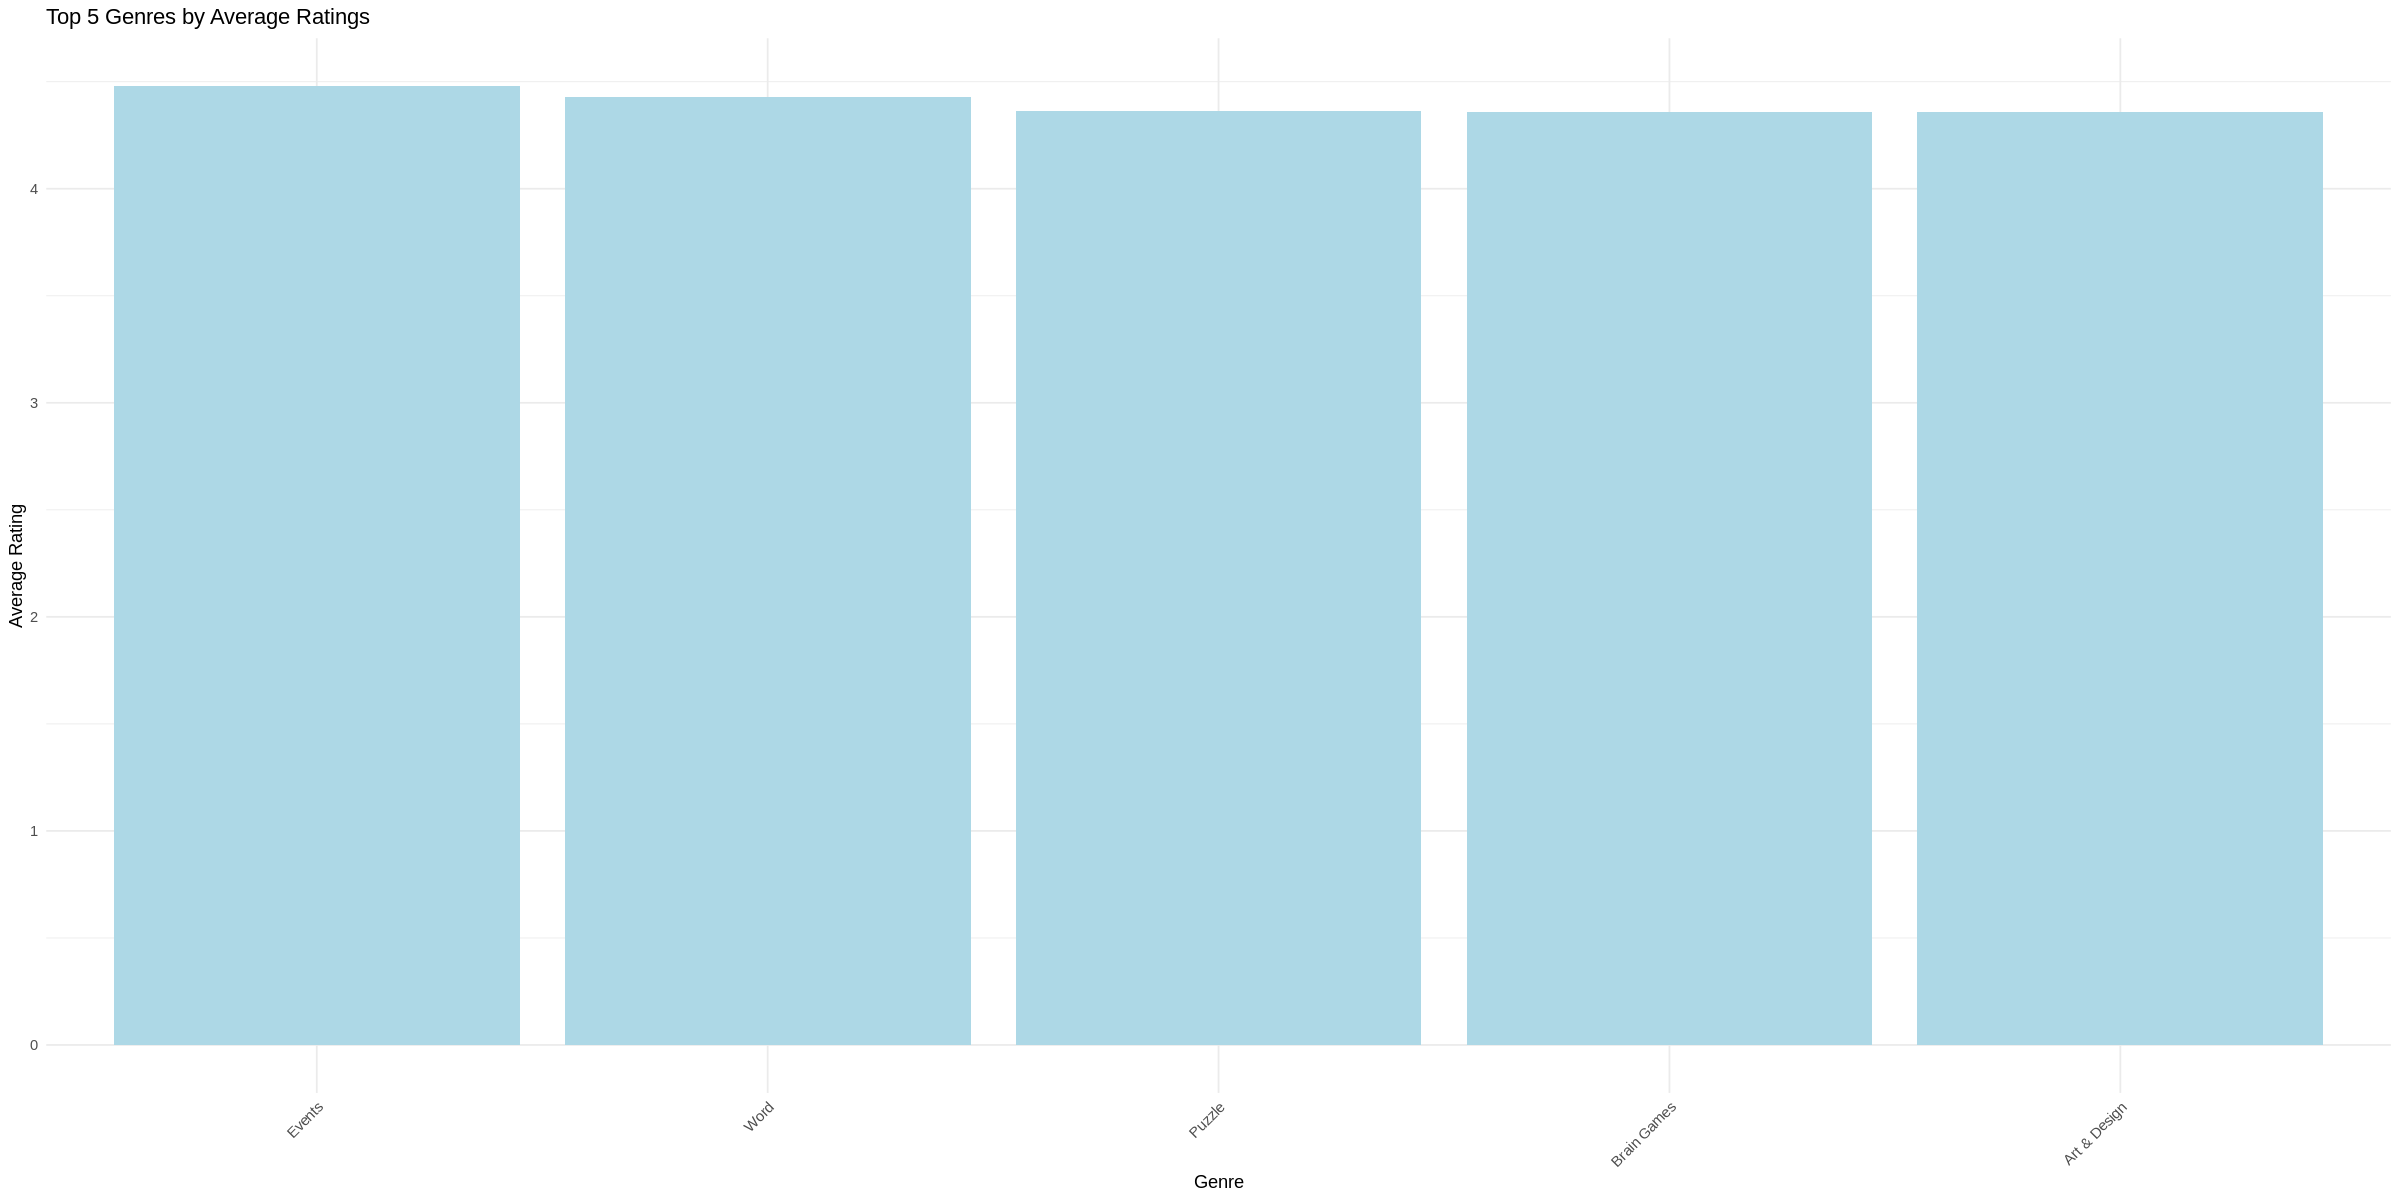

In [21]:
data1 <- data1 %>%
  separate_rows(Genres, sep = ";")

avg_rating_by_genre <- data1 %>%
  group_by(Genres) %>%
  summarize(Avg_Rating = mean(Rating, na.rm = TRUE))

avg_rating_by_genre <- avg_rating_by_genre %>%
  arrange(desc(Avg_Rating))

top_5_genres <- head(avg_rating_by_genre, 5)

ggplot(top_5_genres, aes(x = reorder(Genres, -Avg_Rating), y = Avg_Rating)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  labs(
    title = "Top 5 Genres by Average Ratings",
    x = "Genre",
    y = "Average Rating"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Yes, apps in certain genres tend to have higher ratings and the top genres in terms of average ratings are Events, Word, Puzzle, Brain Games, Art & Design.

## What is the distribution of sentiment polarity for user reviews in the Google Play Store, and how does it vary across different sentiment categories?

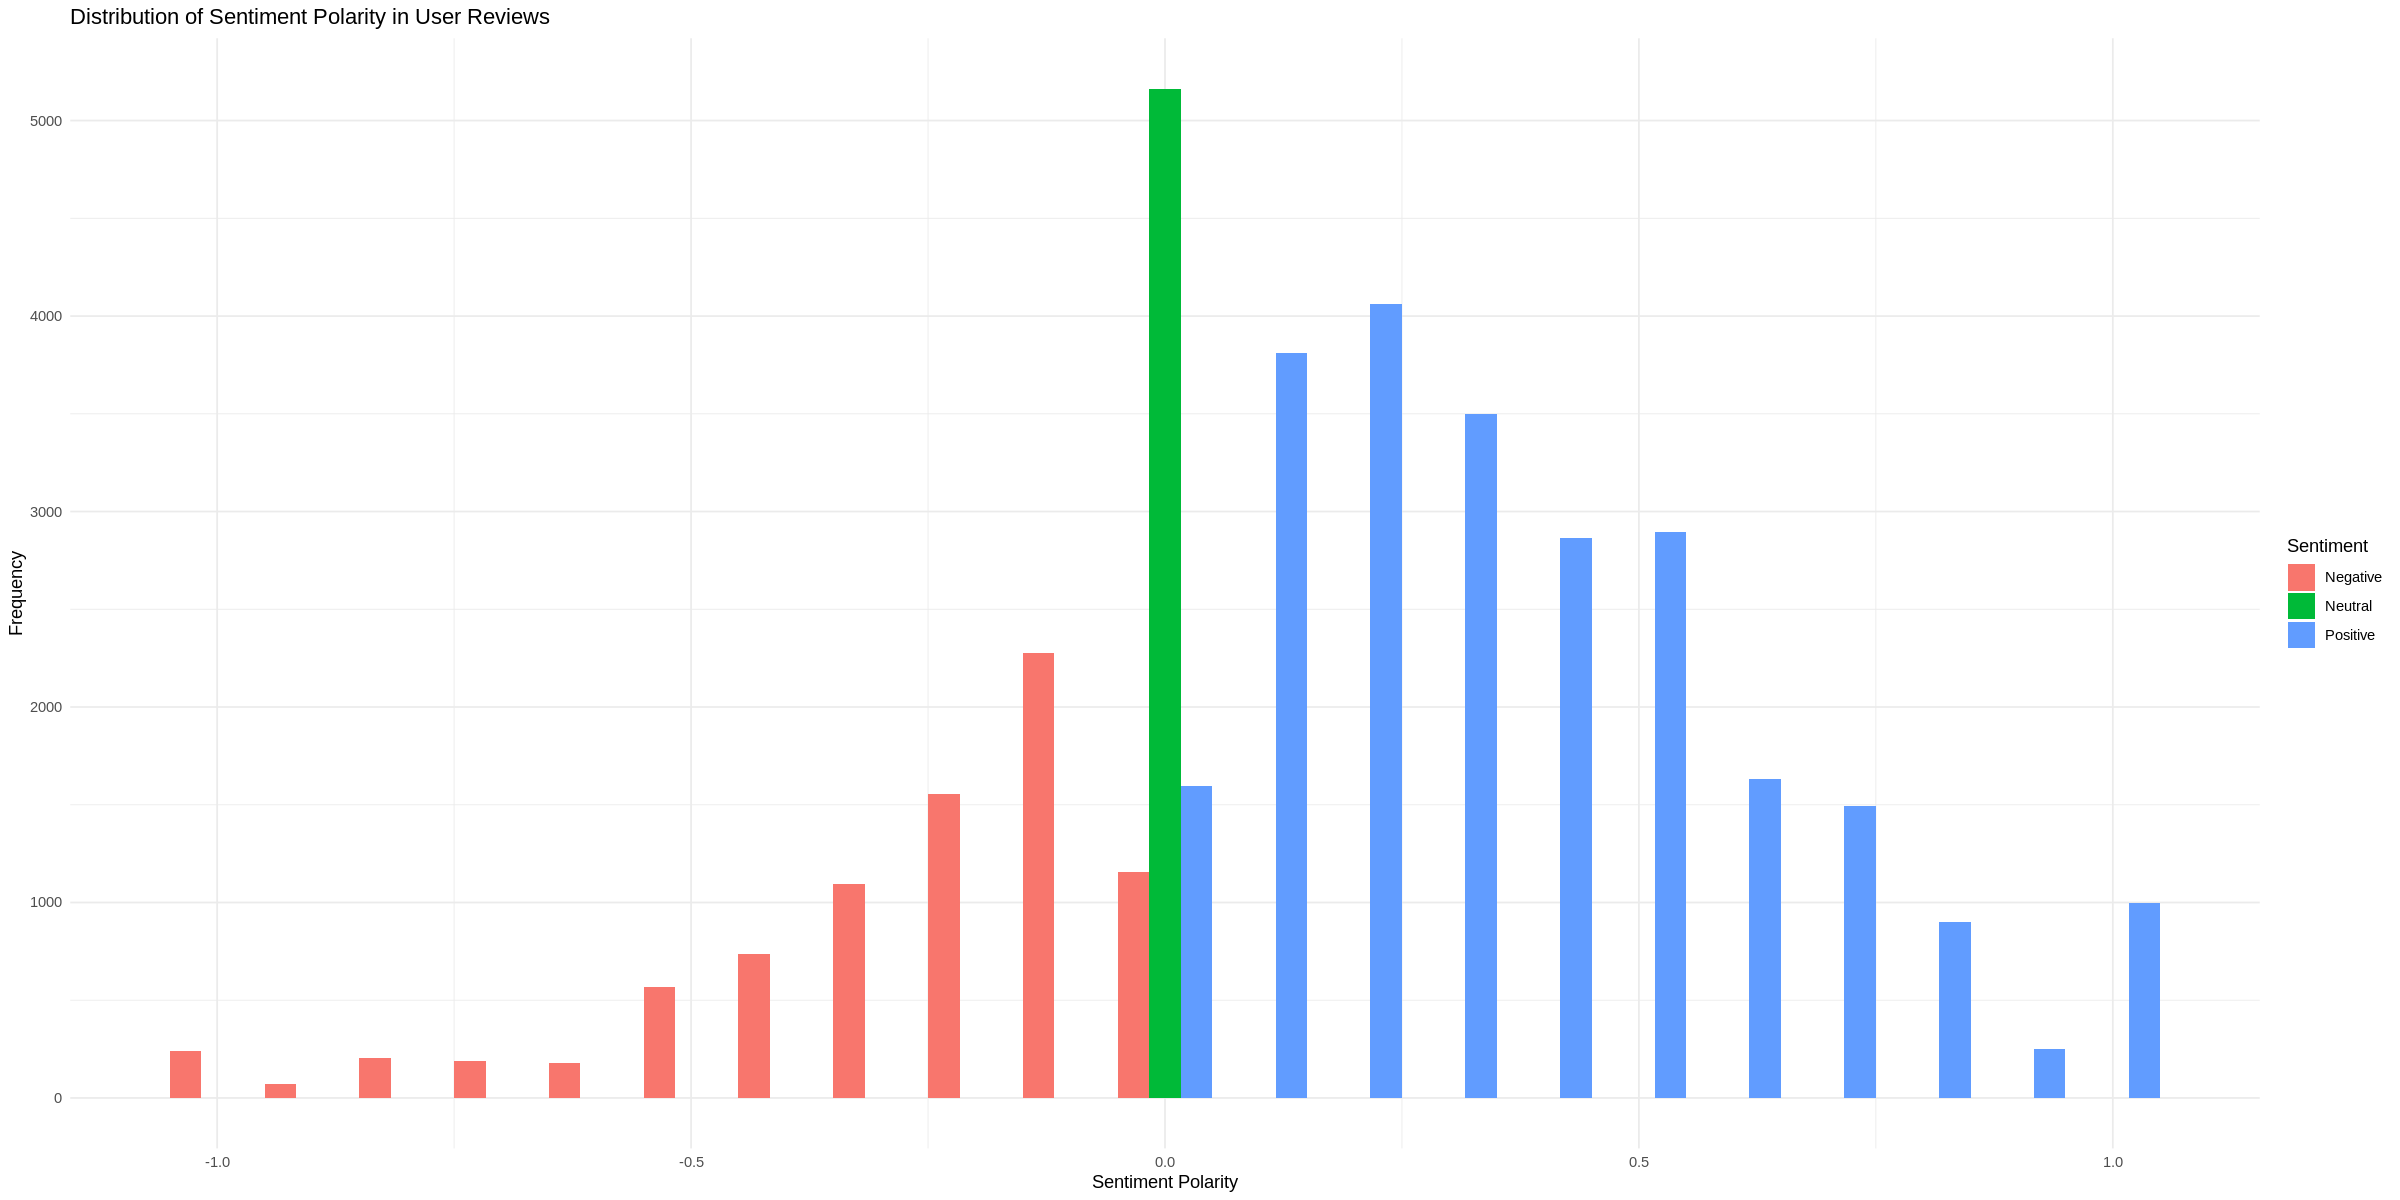

In [22]:
ggplot(data2, aes(x = Sentiment_Polarity, fill = Sentiment)) +
  geom_histogram(binwidth = 0.1, position = "dodge") +
  labs(
    title = "Distribution of Sentiment Polarity in User Reviews",
    x = "Sentiment Polarity",
    y = "Frequency",
    fill = "Sentiment"
  ) +
  theme_minimal()

Negative sentiment has the least distribution compared to positive sentiment, but neutral sentiment has the highest frequency compared to other types of sentiment.